In [1]:
import yahoo_finance
import pandas as pd
from datetime import datetime
import yfinance as yf
import torch
import torch.nn as nn

In [2]:
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [3]:
def date_string_to_numeric(st):
    print(st)
    try:
        splitted_column_value = st.split("")
        return int(splitted_column_value[0])
    except:
        print(st)

In [4]:
after_2010 = table[
    [
        datetime.strptime(dt, "%Y-%m-%d") < datetime(2010, 1, 1)
        for dt in table["Date added"]
    ]
]

In [5]:
# tickers = list(after_2010["Symbol"])
wanted_symbols = ["GOOGL", "META", "MSFT", "AMZN", "AAPL"]

# tickers = list(after_2010["Symbol"])
tickers = wanted_symbols

In [6]:
symbol_date = yf.download(
    tickers=tickers, start="2010-01-01", interval="1d", group_by="ticker"
)

[*********************100%%**********************]  5 of 5 completed


In [7]:
is_null = pd.DataFrame(symbol_date.isnull())

In [8]:
symbol = "GOOGL"

/home/syntheticdemon/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/syntheticdemon/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


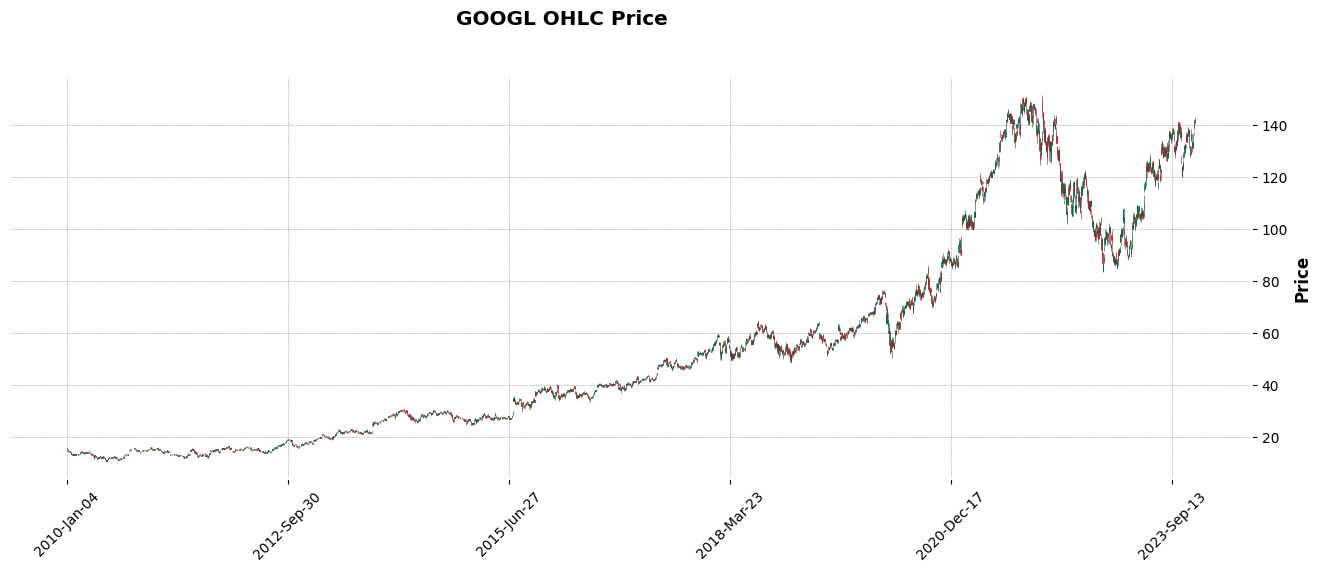

In [9]:
import mplfinance as mpf
import pandas as pd

symbol_ohlc_gen = symbol_date[symbol]
symbol_ohlc_gen = symbol_ohlc_gen.asfreq("D")
symbol_ohlc_gen = symbol_ohlc_gen.fillna(method="ffill")
close_price_return = symbol_date[symbol]["Close"].pct_change()


def plot_ohlc(symbol_ohlc):
    symbol_ohlc["Date"] = pd.to_datetime(symbol_ohlc.index)
    symbol_ohlc.set_index("Date", inplace=True)
    symbol_ohlc.sort_index(inplace=True)
    mpf.plot(
        symbol_ohlc,
        type="candle",
        style="charles",
        title=symbol + " OHLC Price",
        volume=False,
        figratio=(30, 10),
        figscale=1.0,
    )


plot_ohlc(symbol_ohlc_gen)

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def dist_draw(data_vector):
    plt.hist(
        data_vector, bins=250, edgecolor="k"
    )  # You can adjust the number of bins as needed
    plt.title("Histogram of Close Return Distribution " + symbol)
    plt.xlabel("Return Value")
    plt.ylabel("Frequency")
    plt.show()

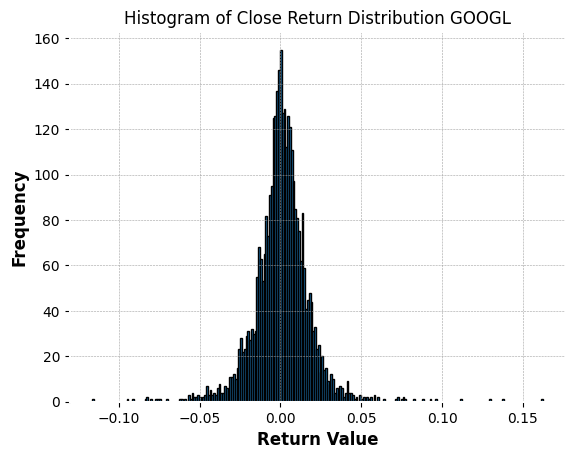

In [11]:
dist_draw(close_price_return.values)

In [12]:
for t in tickers:
    for c in ["Open", "High", "Low", "Close"]:
        if len(is_null[t][c].unique()) > 1:
            print(t, c)

GOOGL Open
GOOGL High
GOOGL Low
GOOGL Close
META Open
META High
META Low
META Close
AAPL Open
AAPL High
AAPL Low
AAPL Close


In [13]:
wanted_symbols = ["GOOGL", "META", "MSFT", "AMZN", "AAPL"]
wanted_symbols_ohlc = yf.download(
    tickers=wanted_symbols, start="2010-01-01", interval="1d", group_by="ticker"
)


def fill_with_first_non_null(series):
    first_non_null = series.dropna().iloc[0]
    return series.fillna(first_non_null)


for symbol in wanted_symbols:
    wanted_symbols_ohlc[symbol] = wanted_symbols_ohlc[symbol].apply(
        fill_with_first_non_null
    )

[*********************100%%**********************]  5 of 5 completed


In [14]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

n_splits = 30
tscv = TimeSeriesSplit(n_splits=n_splits)

splitted_dataset = tscv.split(wanted_symbols_ohlc)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random as random
import pandas as pd

train, test = train_test_split(wanted_symbols_ohlc, test_size=0.2, random_state=42)

# Prepare and Train Data


In [16]:
scaler = MinMaxScaler()
wanted_symbols_ohlc_normalized = scaler.fit_transform(train)
wanted_symbols_ohlc_test_normalized = scaler.transform(test)
wanted_symbols_ohlc_normalized = pd.DataFrame(
    wanted_symbols_ohlc_normalized,
    columns=wanted_symbols_ohlc.columns,
    index=train.index,
).sort_index()
scaled_test_data = pd.DataFrame(
    wanted_symbols_ohlc_test_normalized,
    columns=wanted_symbols_ohlc.columns,
    index=test.index,
).sort_index()

In [17]:
scaled_test_data["GOOGL"]["Close"]

Date
2010-01-04    0.034348
2010-01-13    0.027204
2010-01-25    0.018721
2010-01-28    0.017693
2010-02-09    0.018080
                ...   
2023-11-27    0.903341
2023-12-07    0.907083
2023-12-11    0.880882
2023-12-14    0.871165
2023-12-19    0.905068
Name: Close, Length: 704, dtype: float64

In [18]:
wanted_symbols_ohlc_normalized["GOOGL"]["Close"]

Date
2010-01-05    0.033850
2010-01-06    0.031017
2010-01-07    0.028466
2010-01-08    0.029893
2010-01-11    0.029729
                ...   
2023-12-20    0.917233
2023-12-21    0.932205
2023-12-22    0.939907
2023-12-26    0.940123
2023-12-27    0.930945
Name: Close, Length: 2816, dtype: float64

In [19]:
def generate_tickers(h_input, x_features, y_features, window_size=30):
    closes = h_input[x_features]
    y_tickers_sp500 = []
    x_tickers_sp500 = []
    X_time_series = []
    Y_time_series = []
    for i in range(window_size, len(h_input)):
        X_time_series.append(closes[x_features].iloc[i - window_size : i])
        Y_time_series.append(closes[y_features].iloc[i])

    X_time_series = np.array(X_time_series)
    Y_time_series = np.array(Y_time_series)
    x_tickers_sp500.append(X_time_series[(31 - window_size) :])
    y_tickers_sp500.append(Y_time_series[(31 - window_size) :])
    x_tickers_sp_500_ = torch.tensor(x_tickers_sp500[0])
    y_tickers_sp_500_ = torch.tensor(y_tickers_sp500[0])
    return (x_tickers_sp_500_, y_tickers_sp_500_)


# TODO Train without scaling and report performance

In [20]:
import torch
import torch.nn as nn


class LSTMBidrectionalSupportingNetwork(nn.Module):
    def __init__(self, num_features, hidden_units, output_features, num_layers=1):
        super(LSTMBidrectionalSupportingNetwork, self).__init__()
        self.lstm = nn.LSTM(
            num_features,
            hidden_units,
            batch_first=True,
            num_layers=num_layers,
            bidirectional=True,
        )
        self.hidden_units = hidden_units
        linear_input_size = hidden_units * 2
        self.linear = nn.Sequential(
            nn.Linear(linear_input_size, linear_input_size),
            nn.ReLU(),
            nn.Linear(linear_input_size, linear_input_size),
            nn.ReLU(),
            nn.Linear(linear_input_size, output_features),
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_time_step_out = torch.cat(
            (
                lstm_out[:, -1, : self.hidden_units],
                lstm_out[:, 0, self.hidden_units :],
            ),
            dim=1,
        )

        y_pred = self.linear(last_time_step_out)
        return y_pred


class LSTMNet(nn.Module):
    def __init__(self, num_features, hidden_units, output_features, num_layers=1):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(
            num_features, hidden_units, batch_first=True, num_layers=num_layers
        )

        self.linear = nn.Sequential(
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features),
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_time_step_out = lstm_out[:, -1, :]
        y_pred = self.linear(last_time_step_out)
        return y_pred


class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(input_size, input_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x


class GRUNet(nn.Module):
    def __init__(
        self, input_size, hidden_size, num_layers, output_size, bidirectional=False
    ):
        super(GRUNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.gru = nn.GRU(
            input_size,
            hidden_size,
            num_layers,
            batch_first=True,
            bidirectional=bidirectional,
        )
        self.hidden_units = hidden_units
        self.fc = nn.Sequential(
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features),
        )

    def forward(self, x):
        h0 = torch.zeros(
            self.num_layers * 2 if self.bidirectional else self.num_layers,
            x.size(0),
            self.hidden_size,
        ).to(x.device)
        out, _ = self.gru(x, h0)
        if self.bidirectional:
            out = self.fc(
                torch.cat(
                    (out[:, -1, : self.hidden_size], out[:, 0, self.hidden_size :]),
                    dim=1,
                )
            )
        else:
            out = self.fc(out[:, -1, :])

        return out

In [34]:
from torch.utils.data import TensorDataset, DataLoader
from matplotlib.pyplot import plot

num_features = 1
hidden_units = 30
output_features = 1
lstm_model = LSTMNet(num_features, hidden_units, output_features)
bi_lstm_model = LSTMBidrectionalSupportingNetwork(
    num_features, hidden_units, output_features
)
gru = GRUNet(num_features, hidden_units, num_features, num_features)
import torch
import torch.nn.functional as F


def mape(predictions, targets):
    return 100 * torch.mean(torch.abs((targets - predictions) / targets))

def plot_predicted_prices(ticker_name):
    ticker_tickers = generate_tickers(
        scaled_test_data[ticker_name],
        [
            "Close"
            # , "Volume"
        ],
        ["Close"],
    )
    fig, axes = plt.subplots(
        nrows=2, ncols=3, figsize=(15, 10)
    )  # Adjust the size as needed
    plt.plot(
        bi_lstm_model(ticker_tickers[0].float()).detach(),
        color="red",
    )
    plt.plot(ticker_tickers[1].detach(), color="blue")
    plt.plot(lstm_model(ticker_tickers[0].float()).detach(), color="green")
    fig1.set_size_inches(20, 10)
    plt.show()


def train(
    model, num_epochs=25, batch_size=256, lr=0.001, wanted_symbols=wanted_symbols
):
    test_tickers = []
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    number_of_runs = 0
    for ticker_index, ticker_name in enumerate(wanted_symbols):
        print("Ticker Name : ", ticker_name)
        full_data = wanted_symbols_ohlc_normalized[ticker_name]
        print(ticker_name, len(full_data))
        for j, (train_index, test_index) in enumerate(tscv.split(full_data)):
            seed_value = 42
            torch.manual_seed(seed_value)
            torch.cuda.manual_seed(seed_value)
            torch.cuda.manual_seed_all(seed_value)
            random.seed(seed_value)
            np.random.seed(seed_value)
            number_of_runs += 1
            train_data = full_data.iloc[train_index]
            train_data_tickers = generate_tickers(
                train_data,
                [
                    "Close"
                    #  , "Volume"
                ],
                ["Close"],
            )
            test_data = full_data.iloc[test_index]
            test_data_tickers = generate_tickers(
                test_data,
                [
                    "Close"
                    # , "Volume"
                ],
                ["Close"],
            )
            test_tickers.append(test_data_tickers)
            train_dataset = TensorDataset(train_data_tickers[0], train_data_tickers[1])
            train_loader = DataLoader(
                train_dataset, batch_size=batch_size, shuffle=False
            )
            test_dataset = TensorDataset(test_data_tickers[0], test_data_tickers[1])
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            for train_features, train_labels in train_loader:
                for epoch in range(num_epochs):
                    optimizer.zero_grad()
                    outputs = model(train_features.float().to("cpu"))
                    loss = criterion(outputs, train_labels.float().to("cpu"))
                    loss.backward()
                    optimizer.step()
                    model.eval()
                    with torch.no_grad():
                        val_outputs = model(test_data_tickers[0].float())
                        validation_mae_value = F.l1_loss(
                            val_outputs, test_data_tickers[1].float()
                        )
                        validation_mse_value = F.mse_loss(
                            val_outputs, test_data_tickers[1].float()
                        )
                        validation_mape_value = mape(
                            val_outputs, test_data_tickers[1].float()
                        )
                        train_mae_value = F.l1_loss(outputs, train_labels.float())
                        train_mse_value = F.mse_loss(outputs, train_labels.float())
                        train_mape_value = mape(outputs, train_labels.float())
                        val_loss = criterion(val_outputs, test_data_tickers[1].float())
                        print(
                            f"Epoch {epoch+1}/{num_epochs}, Train Loss : {loss.item()}",
                            f"Epoch {epoch+1}/{num_epochs}, Train MAE Value: {train_mae_value}",
                            f"Epoch {epoch+1}/{num_epochs}, Train MSE Value: {train_mse_value}",
                            f"Epoch {epoch+1}/{num_epochs}, Train  MAPE Value: {train_mape_value}",
                            f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss.item()}",
                            f"Epoch {epoch+1}/{num_epochs}, Validation MAE Value: {validation_mae_value}",
                            f"Epoch {epoch+1}/{num_epochs}, Validation MSE Value: {validation_mse_value}",
                            f"Epoch {epoch+1}/{num_epochs}, Validation MAPE Value: {validation_mape_value}",
                        )

# CNN 

In [212]:
class Simple1DCNN(nn.Module):
    def __init__(self):
        super(Simple1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(
            in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1
        )
        self.conv2 = nn.Conv1d(
            in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1
        )
        self.fc1 = nn.Linear(32 * 30, 50)  # Adjust based on the out
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, 1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
cnn = Simple1DCNN()
train(cnn, num_epochs=50, batch_size=512, lr=0.001)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleMLP, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, input_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(input_size, input_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = torch.squeeze(x, dim=2)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# MLP

In [64]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleMLP, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, input_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(input_size, input_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = torch.squeeze(x, dim=2)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [65]:
mlp = SimpleMLP(30, 1)  # Three layers of MLP like the output network of the LSTM

In [ ]:
train(mlp, num_epochs=50, batch_size=512, lr=0.001)

# Bi LSTM

In [ ]:
train(bi_lstm_model, num_epochs=50, batch_size=512, lr=0.001)

# Normal LSTM 

In [ ]:
train(lstm_model, batch_size=512, num_epochs=50, lr=0.001)

# GRU 

In [ ]:
train(gru, num_epochs=50,batch_size=512, lr=0.001)

In [224]:
class CNN_LSTM(nn.Module):
    def __init__(self):
        super(CNN_LSTM, self).__init__()
        self.cnn1 = nn.Conv1d(
            in_channels=1, out_channels=16, kernel_size=3, stride=1, padding="same"
        )
        # self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.cnn2 = nn.Conv1d(
            in_channels=16, out_channels=32, kernel_size=3, stride=1, padding="same"
        )

        self.lstm = nn.LSTM(
            input_size=32, hidden_size=50, num_layers=1, batch_first=True
        )
        self.linear = nn.Linear(50, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 1)

    def forward(self, x):
        # n * 30 * 1 to n * 1 * 30
        x = x.permute(0, 2, 1)
        x = F.relu(self.cnn1(x))
        x = F.relu(self.cnn2(x))
        # n * 32 * 30 to n * 30 * 32
        x = x.permute(0, 2, 1)
        x, __ = self.lstm(x)
        x = self.linear(x[:, -1, :])
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [ ]:
cnn_lstm = CNN_LSTM()
train(gru, num_epochs=50, batch_size=512, lr=0.001)

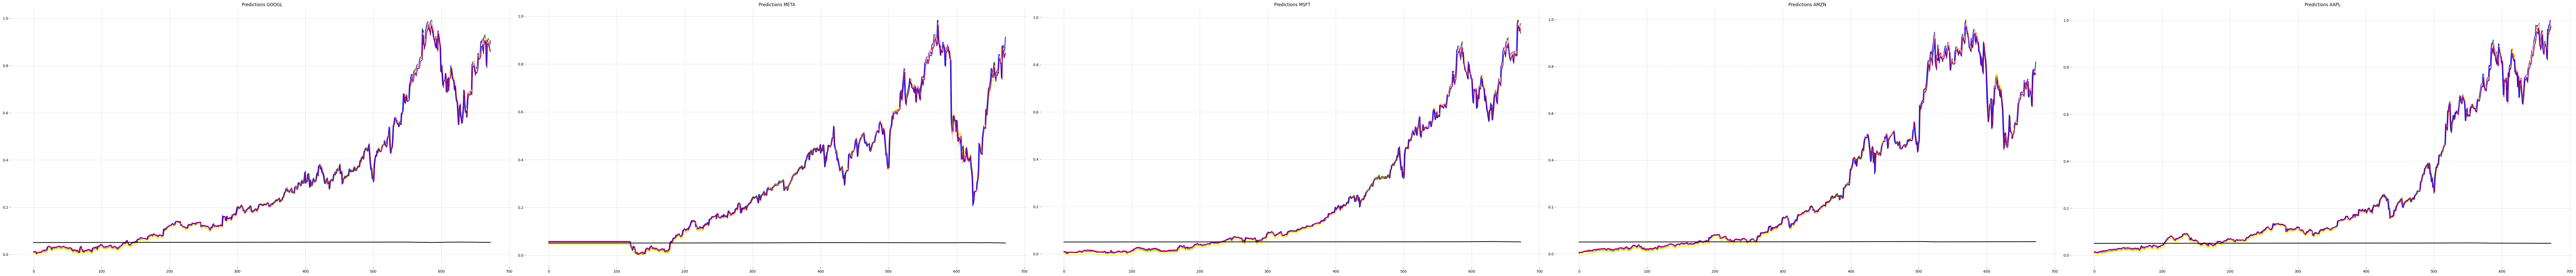

In [226]:
data_sets = [np.random.randn(100) for _ in range(6)]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(100, 10.80))

axes = axes.flatten()

for i, ax in enumerate(axes):
    with torch.no_grad():
        ticker_tickers = generate_tickers(
            scaled_test_data[wanted_symbols[i]],
            [
                "Close",
                #  "Volume"
            ],
            ["Close"],
        )
        ax.plot(ticker_tickers[1].detach(), color="blue")
        ax.plot(lstm_model(ticker_tickers[0].float()).detach(), color="green")
        ax.plot(
            bi_lstm_model(ticker_tickers[0].float()).detach(),
            color="red",
        )
        ax.plot(
            mlp(ticker_tickers[0].float()).detach(),
            color="yellow",
        )
        ax.plot(
            cnn(ticker_tickers[0].float()).detach(),
            color="pink",
        )
        ax.plot(
            gru(ticker_tickers[0].float()).detach(),
            color="purple",
        )
        ax.plot(
            cnn_lstm(ticker_tickers[0].float()).detach(),
            color="black",
        )
        ax.set_title(f"Predictions {wanted_symbols[i]}")
        ax.grid(True)

plt.tight_layout()

plt.show()

In [218]:
def naive_forecast(test_x):
    return test_x[:, -1]  #

In [219]:
def print_errors(model, test_y, test_x):
    with torch.no_grad():
        outputs = model(test_x.float())
        train_mae_value = F.l1_loss(outputs, test_y)
        train_mse_value = F.mse_loss(outputs, test_y)
        train_mape_value = mape(outputs, test_y)
        print("Model : " , type(model))
        print(
            f"Test MAE Value: {train_mae_value}",
            f"Test MSE Value: {train_mse_value}",
            f"Test  MAPE Value: {train_mape_value}",
        )

In [220]:
test_x = ticker_tickers[0]
test_y = ticker_tickers[1]

# Test Loss

In [ ]:
print_errors(gru, test_y, test_x)
print_errors(bi_lstm_model, test_y, test_x)
print_errors(lstm_model, test_y, test_x)
print_errors(mlp, test_y, test_x)
print_errors(naive_forecast, test_y, test_x)
print_errors(cnn, test_y, test_x)
print_errors(cnn_lstm,test_y,test_x)

In [ ]:
Model :  <class '__main__.GRUNet'>
Test MAE Value: 0.00989416360621541 Test MSE Value: 0.0003747091786817085 Test  MAPE Value: 4.16689051298975
Model :  <class '__main__.LSTMBidrectionalSupportingNetwork'>
Test MAE Value: 0.009612590035469928 Test MSE Value: 0.0003568254817452168 Test  MAPE Value: 4.7304205297486694
Model :  <class '__main__.LSTMNet'>
Test MAE Value: 0.009830762473864668 Test MSE Value: 0.00035153377299276215 Test  MAPE Value: 5.838442574682189
Model :  <class '__main__.SimpleMLP'>
Test MAE Value: 0.013940928515819823 Test MSE Value: 0.00041492124455413005 Test  MAPE Value: 13.456184867178166
Model :  <class 'function'>
Test MAE Value: 0.00921957838134566 Test MSE Value: 0.00034736469240984324 Test  MAPE Value: 3.9747886424122574
Model :  <class '__main__.Simple1DCNN'>
Test MAE Value: 0.010657007854961582 Test MSE Value: 0.0003712811376826124 Test  MAPE Value: 5.888829931710761
Model :  <class '__main__.CNN_LSTM'>
Test MAE Value: 0.22508162779325097 Test MSE Value: 0.12921181294836223 Test  MAPE Value: 69.26961666547906